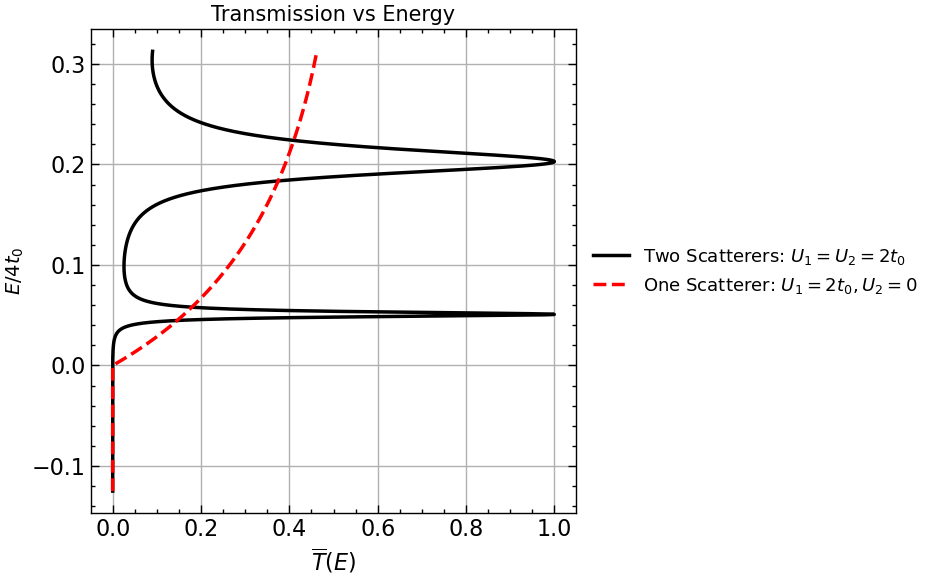

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook"])

# === Parameters ===
t0 = 1.0                # Hopping energy
Np = 100                 # Number of sites in the wire
N1, N2 = 3, 9           # Scatterer positions
VV = 0                   # No bias
zplus = 1j * 1e-12      # Small imaginary part for convergence
dE = 5e-4               # Fine energy resolution
E_list = np.arange(-0.5, 1.25 + dE, dE) * t0

# === Common Diagonals ===
main_diag = 2 * t0 * np.ones(Np)
off_diag = -t0 * np.ones(Np - 1)

# === Store results ===
Tcoh_2s = []
theta_2s = []
Tcoh_1s = []
theta_1s = []

# === Common Linear Potential ===
UV = np.linspace(0, -VV, Np)
U = np.diag(UV)

# === CASE 1: TWO SCATTERERS ===
UB1 = 2 * t0
UB2 = 2 * t0

# Hamiltonian with two scatterers
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
H0[N1, N1] += UB1
H0[N2, N2] += UB2


for EE in E_list:
# Self-energies
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # Broadening matrices
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # Green's function
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # Transmission
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh_2s.append(T)

    # Theta (normalized phase)
    theta = np.real(ka1) * (N2 - N1 + 1) / np.pi
    theta_2s.append(theta)

# === CASE 2: ONE SCATTERER ONLY ===
UB1 = 2 * t0
UB2 = 0 * t0

# Hamiltonian with one scatterer
H0 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
H0[N1, N1] += UB1
H0[N2, N2] += UB2

for EE in E_list:  
    # Self-energies
    ck1 = 1 - (EE - UV[0] + zplus) / (2 * t0)
    ka1 = np.arccos(ck1)
    s1 = -t0 * np.exp(1j * ka1)
    Sigma1 = np.zeros((Np, Np), dtype=complex)
    Sigma1[0, 0] = s1

    ck2 = 1 - (EE - UV[-1] + zplus) / (2 * t0)
    ka2 = np.arccos(ck2)
    s2 = -t0 * np.exp(1j * ka2)
    Sigma2 = np.zeros((Np, Np), dtype=complex)
    Sigma2[-1, -1] = s2

    # Broadening matrices
    Gamma1 = 1j * (Sigma1 - Sigma1.conj().T)
    Gamma2 = 1j * (Sigma2 - Sigma2.conj().T)

    # Green's function
    G_R = np.linalg.inv((EE + zplus) * np.eye(Np) - H0 - U - Sigma1 - Sigma2)

    # Transmission
    T = np.real(np.trace(Gamma1 @ G_R @ Gamma2 @ G_R.conj().T))
    Tcoh_1s.append(T)

    # Theta (same formula)
    theta = np.real(ka1) * (N2 - N1 + 1) / np.pi
    theta_1s.append(theta)

# === Plotting ===
plt.figure(figsize=(9.5, 6))


plt.plot(Tcoh_2s, E_list / (4 * t0), 'k-', linewidth=2.5, label=r"Two Scatterers: $U_1 = U_2 = 2t_0$")
plt.plot(Tcoh_1s, E_list / (4 * t0), 'r--', linewidth=2.5, label=r"One Scatterer: $U_1 = 2t_0, U_2 = 0$")


plt.xlabel(r"$\overline{T}(E)$", fontsize=16)
plt.ylabel(r"$E / 4t_0$", fontsize=14)
plt.title("Transmission vs Energy", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, frameon=False)
plt.grid(True)
plt.tight_layout()
plt.show()


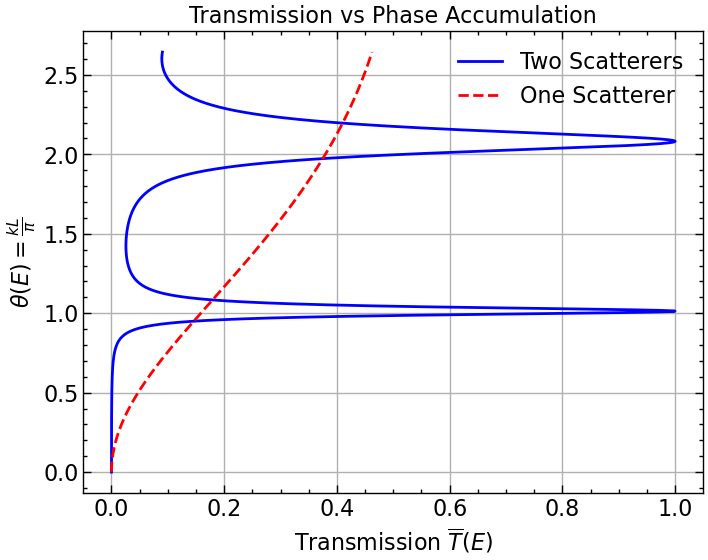

In [3]:
plt.plot( Tcoh_2s,theta_2s, 'b-', label='Two Scatterers')
plt.plot( Tcoh_1s, theta_1s,'r--', label='One Scatterer')
plt.ylabel(r'$\theta(E) = \frac{kL}{\pi}$')
plt.xlabel(r'Transmission $\overline{T}(E)$')
plt.legend()
plt.grid(True)
plt.title('Transmission vs Phase Accumulation')
plt.show()
